In [1]:
from pathlib import Path
import json
import re
import numpy as np
from tqdm import tqdm
import string
from PIL import Image
import matplotlib.pyplot as plt
import textgrids

num_episodes = 1000

aud_files = Path("../../../Datasets/flickr_audio")
ss_save_fn = '../support_set/support_set.npz'
image_base = Path('../../../Datasets/Flicker8k_Dataset')
support_set = np.load(ss_save_fn, allow_pickle=True)['support_set'].item()
val_fn = Path('../data/test.json')
val = {}

vocab = []
with open('../data/test_keywords.txt', 'r') as f:
    for keyword in f:
        vocab.append(' '.join(keyword.split()))

translation = {}
image_labels = {}
yoruba_vocab = []
with open(Path('../../../Datasets/yfacc_v6/Flickr8k_text/eng_yoruba_keywords.txt'), 'r') as f:
    for line in f:
        e, y = line.strip().split(', ')
        if e in vocab:
            translation[y] = e
            yoruba_vocab.append(y)
for y in translation:
    print(y, translation[y])

for txt_grid in Path('../../../Datasets/yfacc_v6/Flickr8k_alignment').rglob('*.TextGrid'):
    if str(txt_grid) == '../../../Datasets/yfacc_v6/Flickr8k_alignment/3187395715_f2940c2b72_0.TextGrid': continue
    grid = textgrids.TextGrid(txt_grid)
    wav = 'S001_' + txt_grid.stem
    im = '_'.join(txt_grid.stem.split('_')[0:2])

    for interval in grid['words']:
        
        x = str(interval).split()
        label = str(interval).split('"')[1]
        start = x[-2].split('=')[-1]
        dur = x[-1].split('=')[-1].split('>')[0]

        if label in yoruba_vocab:
            
            if im not in image_labels: image_labels[im] = set()
            image_labels[im].add(label)

alignments = {}
prev = ''
prev_wav = ''
prev_start = 0
with open(aud_files / 'flickr_8k.ctm', 'r') as f:
    for line in f:
        name, _, start, dur, label = line.strip().split()
        wav = name.split('.')[0] + '_' + name.split('#')[-1]
        label = label.lower()
        if label in vocab:
            if wav not in alignments: alignments[wav] = {}
            if label not in alignments[wav]: alignments[wav][label] = (float(start), float(start) + float(dur))
        prev = label
        prev_wav = wav
        prev_start = start

s_imgs = []
s_wavs = []

for wav_name in tqdm(support_set):

    wav, img, yor, start, dur, word, _, _, _ = support_set[wav_name]
    s_wavs.append(Path(wav).stem)
    s_imgs.append(Path(img).stem)

with open(val_fn, 'r') as f:
    val = json.load(f)

data = []
words2imgs = {}
words2aud = {}
for w in val:
    for im, eng, yor in val[w]:
        data.append((im, eng, yor, w))
        if w not in words2imgs: words2imgs[w] = []
        words2imgs[w].append(Path(im).stem)
        if w not in words2aud: words2aud[w] = []
        words2aud[w].append(Path(eng).stem)

ọmọkùnrin boy
àwọn ajá dogs
koríko grass
àpáta rock
omi water


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 70658.76it/s]


  0%|                                                                                                                                                                                         | 0/25 [00:00<?, ?it/s]

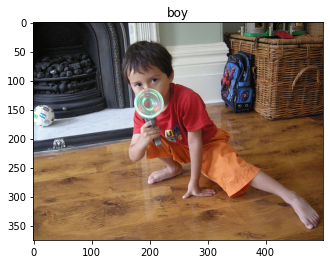

  4%|███████                                                                                                                                                                          | 1/25 [00:00<00:03,  6.76it/s]

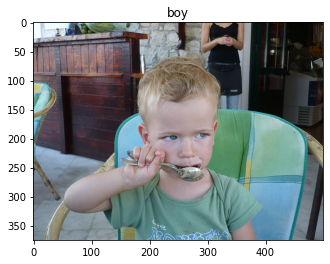

  8%|██████████████▏                                                                                                                                                                  | 2/25 [00:00<00:03,  6.18it/s]

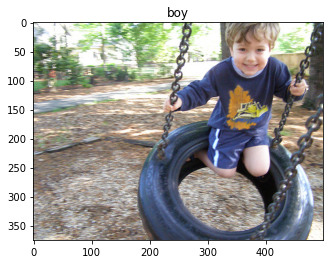

 12%|█████████████████████▏                                                                                                                                                           | 3/25 [00:00<00:03,  6.83it/s]

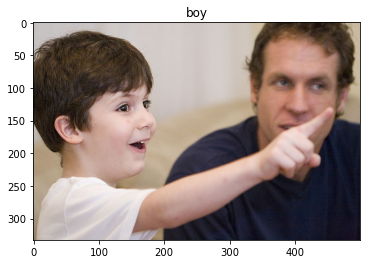

 16%|████████████████████████████▎                                                                                                                                                    | 4/25 [00:00<00:03,  6.77it/s]

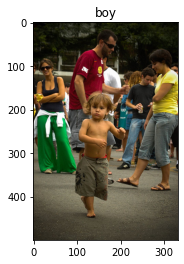

 20%|███████████████████████████████████▍                                                                                                                                             | 5/25 [00:00<00:02,  7.64it/s]

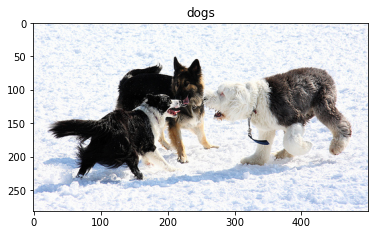

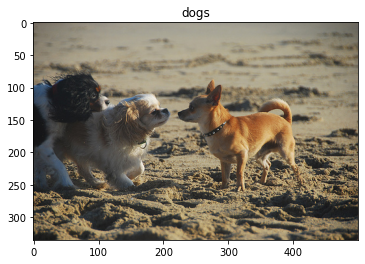

 28%|█████████████████████████████████████████████████▌                                                                                                                               | 7/25 [00:00<00:02,  8.47it/s]

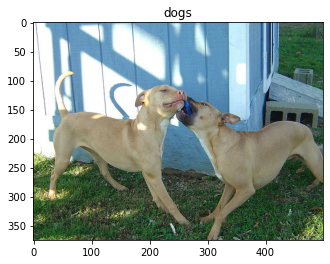

 32%|████████████████████████████████████████████████████████▋                                                                                                                        | 8/25 [00:01<00:01,  8.74it/s]

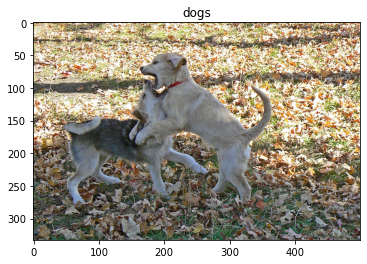

 36%|███████████████████████████████████████████████████████████████▋                                                                                                                 | 9/25 [00:01<00:01,  8.53it/s]

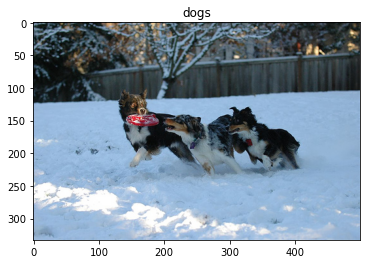

 40%|██████████████████████████████████████████████████████████████████████▍                                                                                                         | 10/25 [00:01<00:01,  8.79it/s]

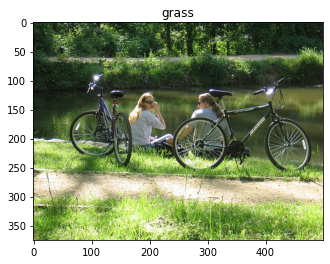

 44%|█████████████████████████████████████████████████████████████████████████████▍                                                                                                  | 11/25 [00:01<00:01,  9.09it/s]

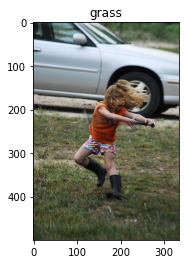

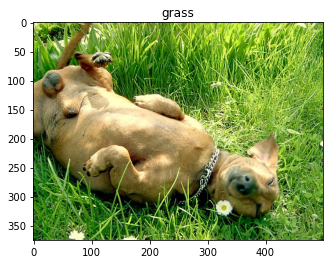

 52%|███████████████████████████████████████████████████████████████████████████████████████████▌                                                                                    | 13/25 [00:01<00:01, 10.01it/s]

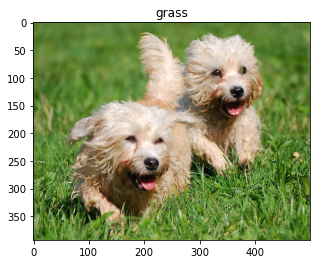

 56%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                             | 14/25 [00:01<00:01,  9.97it/s]

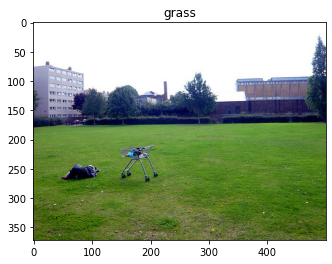

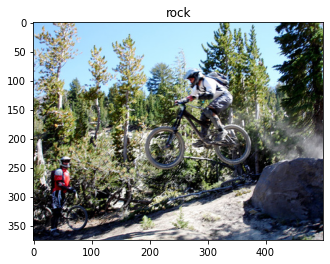

 64%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                               | 16/25 [00:01<00:00, 10.08it/s]

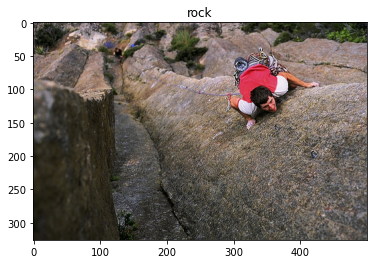

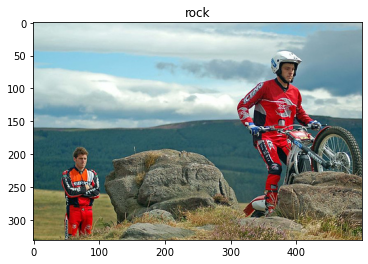

 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                 | 18/25 [00:02<00:00, 10.01it/s]

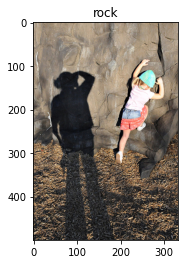

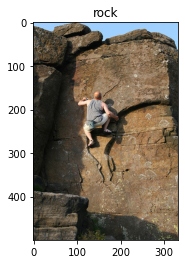

 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 20/25 [00:02<00:00, 10.14it/s]

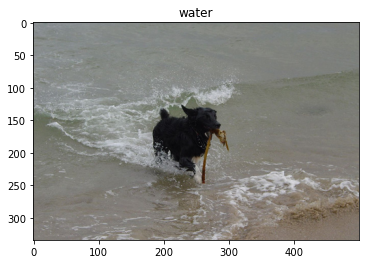

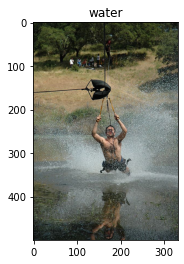

 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                     | 22/25 [00:02<00:00, 10.22it/s]

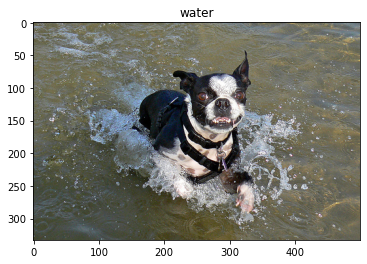

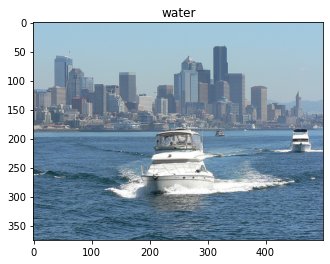

 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 24/25 [00:02<00:00,  9.92it/s]

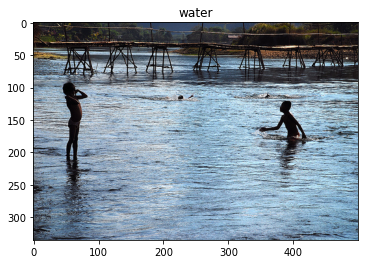

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:02<00:00,  9.21it/s]

{'2999730677_0cfa1c146e', '1224851143_33bcdd299c', '1404832008_68e432665b', '2340206885_58754a799a', '2189995738_352607a63b', '293327462_20dee0de56', '1096395242_fc69f0ae5a', '189721896_1ffe76d89e', '1772859261_236c09b861', '2782433864_5a0c311d87', '2064790732_219e52e19c', '263854883_0f320c1562', '2208067635_39a03834ca', '211295363_49010ca38d', '136644343_0e2b423829', '138718600_f430ebca17', '309687244_4bdf3b591f', '2854207034_1f00555703', '1509786421_f03158adfc', '219070971_ae43410b9e', '1392272228_cf104086e6', '229862312_1a0ba19dab', '315880837_90db309bab', '1415591512_a84644750c', '136552115_6dc3e7231c'}


In [2]:
ss_save_fn = '../support_set/support_set.npz'
support_set = np.load(ss_save_fn, allow_pickle=True)['support_set'].item()

s_imgs = set()

for wav_name in tqdm(support_set):

    eng, img, wav, start, dur, word, _, _, _ = support_set[wav_name]
    s_imgs.add(Path(img).stem)
    impath = Path('../support_set/images') / Path(Path(img).stem + '.jpg') 
    img = Image.open(impath).convert('RGB')
    plt.title(word)
    plt.imshow(img)
    plt.show()
print(s_imgs)

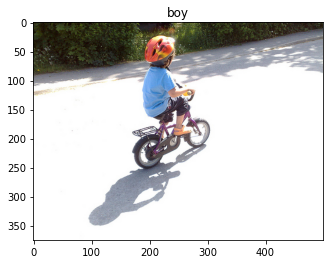

y


ValueError: cannot find widget or abbreviation for argument: 'x'

In [3]:
images = {}
image_words = {}
for word in vocab:
    for im in words2imgs[word]:
        if str(im) in image_labels and str(im) not in s_imgs:
            impath = image_base / Path(str(im) + '.jpg') 

            img = Image.open(impath).convert('RGB')
            plt.title(word)
            plt.imshow(img)

            plt.show()
            choice = input()
            if choice == 'y':
                
                if im not in image_words: image_words[im] = []
                for w in sorted(vocab):
                    present = input(w)
                    if present == 'y':
                        if w not in images: images[w] = []
                        image_words[im].append(w)
                        images[w].append(im)

In [ ]:
for im in image_words:
    image_words[im] = list(set(image_words[im]))

In [ ]:
test_save_fn = '../data/test_episodes_images'
np.savez_compressed(
    Path(test_save_fn).absolute(), 
    images=images,
    image_words=image_words
    )

In [ ]:
images.keys()